In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Step 1 - Data Import and Preprocessing**

In [110]:
# Lets Load Datasets

In [111]:
#Loading Traning data
df=pd.read_csv("/content/drive/MyDrive/train_loan_data (1).csv")
df
#Loading Testing data
test_data=pd.read_csv("/content/drive/MyDrive/test_loan_data.csv")

In [112]:
# Managing missing data, outliers, and data inconsistencies

In [113]:
# Data types info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [114]:
# Display the first few rows of the dataset
df.head(3)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid


In [115]:
# Check the dimensions of the dataset
df.shape

(80000, 28)

In [116]:
# Check for missing values
df.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [117]:
# Impute missing values in numerical features with the mean
numerical_features = ['num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'pub_rec_bankruptcies', 'revol_util']
for feature in numerical_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

# Impute missing values in categorical features with the mode
categorical_features = ['emp_length', 'emp_title', 'title']
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)


In [118]:
# Verify that missing values have been handled
df.isnull().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

In [119]:
# Checking Dublicate values
df.duplicated().sum()

0

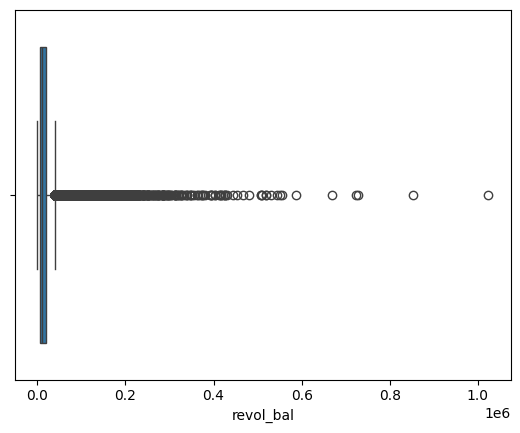

In [120]:
#Outliers Handling
# Detect and handle outliers in numerical features (example for revol_bal)


sns.boxplot(x=df['revol_bal'])
plt.show()

# Based on the box plot, we can apply winsorization to handle outliers
from scipy.stats import mstats
df['revol_bal'] = mstats.winsorize(df['revol_bal'], limits=[0.05, 0.05])


In [121]:
#Data Inconsistencies
# Check unique values and formats of categorical features
categorical_features = ['addr_state', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'application_type', 'purpose', 'sub_grade', 'term', 'title', 'verification_status']
for feature in categorical_features:
    print(f"Unique values for {feature}: {df[feature].unique()}")



Unique values for addr_state: ['CO' 'CA' 'FL' 'IL' 'MD' 'NY' 'PA' 'WI' 'UT' 'TX' 'AL' 'KS' 'AR' 'AZ'
 'MI' 'MN' 'LA' 'HI' 'NC' 'VT' 'OK' 'KY' 'ME' 'CT' 'AK' 'NJ' 'IN' 'GA'
 'MA' 'OR' 'NM' 'VA' 'TN' 'SC' 'NV' 'WY' 'WA' 'WV' 'MO' 'OH' 'MS' 'DC'
 'NE' 'ID' 'NH' 'RI' 'SD' 'MT' 'DE' 'ND' 'IA']
Unique values for emp_length: ['10+ years' '3 years' '< 1 year' '1 year' '8 years' '7 years' '4 years'
 '2 years' '5 years' '6 years' '9 years']
Unique values for emp_title: ['Deputy' 'Department of Veterans Affairs' 'Marble polishing' ...
 'COAL MINER' 'repair tec' 'Sports Group Manager']
Unique values for grade: ['E' 'B' 'F' 'D' 'C' 'A' 'G']
Unique values for home_ownership: ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
Unique values for application_type: ['Individual' 'Joint App']
Unique values for purpose: ['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'small_business' 'medical' 'major_purchase' 'car' 'vacation' 'house'
 'moving' 'wedding' 'renewable_energy' 'educational']
Unique

In [122]:
#Preparing the Data for Analysis through Necessary Transformations

In [123]:
# one-hot encoding for a categorical feature (home_ownership)
df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)


In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


**Step 2 - Exploratory Data Analysis (EDA)**

In [126]:
#Explored the data with summary statistics and visualizations

In [127]:
# Summary statistics for numerical features
numerical_summary = df.describe()
print("Summary statistics for numerical features:")
print(numerical_summary)

# Summary statistics for categorical features
categorical_summary = df.describe(include=['object'])
print("\nSummary statistics for categorical features:")
print(categorical_summary)


Summary statistics for numerical features:
         annual_inc  fico_range_high  fico_range_low      int_rate  \
count  8.000000e+04     80000.000000    80000.000000  80000.000000   
mean   7.604614e+04       699.987975      695.987813     13.232898   
std    6.902006e+04        31.734840       31.734075      4.771705   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.600000e+04       674.000000      670.000000      9.750000   
50%    6.500000e+04       694.000000      690.000000     12.740000   
75%    9.000000e+04       714.000000      710.000000     15.990000   
max    7.141778e+06       850.000000      845.000000     30.990000   

          loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  80000.000000    8.000000e+04  8.000000e+04  8.000000e+04  80000.000000   
mean   14403.867813    9.499068e-17  1.190159e-17 -2.614797e-16     11.605675   
std     8703.826298    1.000006e+00  1.000006e+00  1.000006e+00      5.483362   
mi

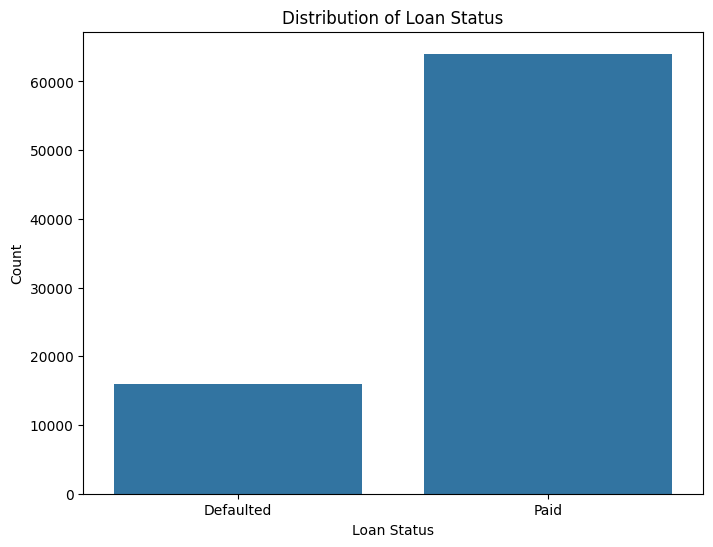

In [128]:
#Visualizations
#Distribution of Target Variable

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


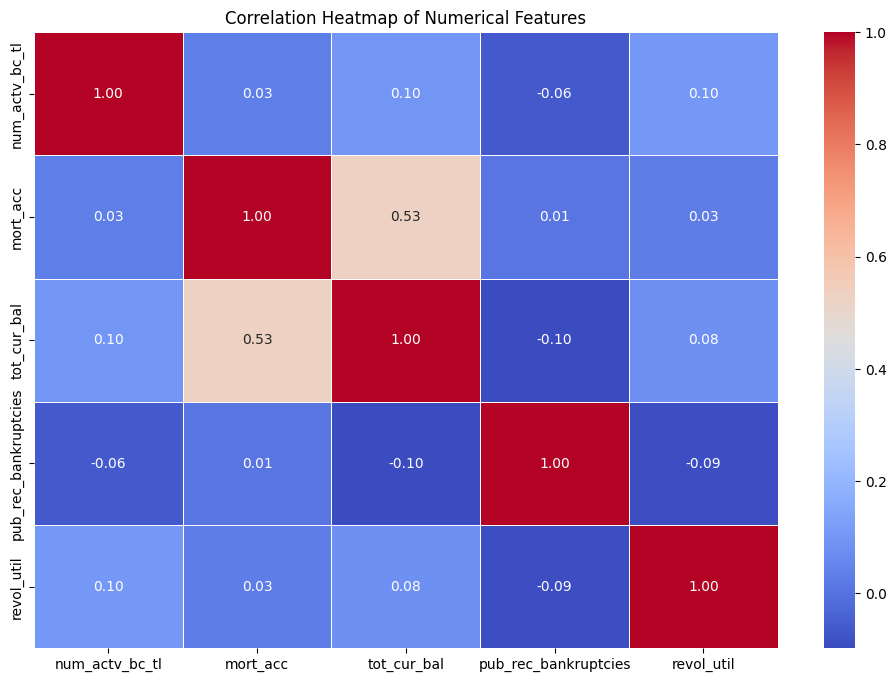

In [129]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


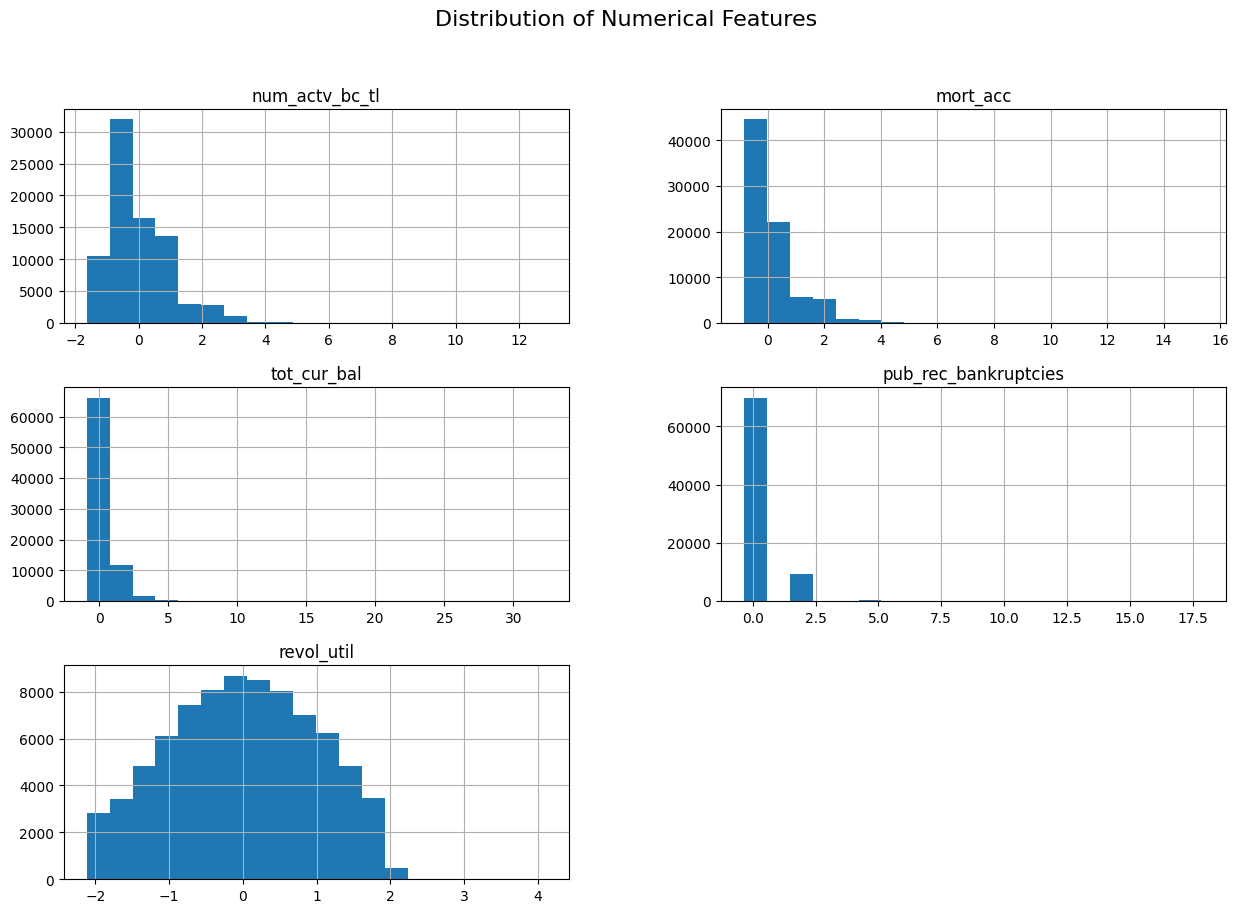

In [130]:
#Distribution of Numerical Features
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


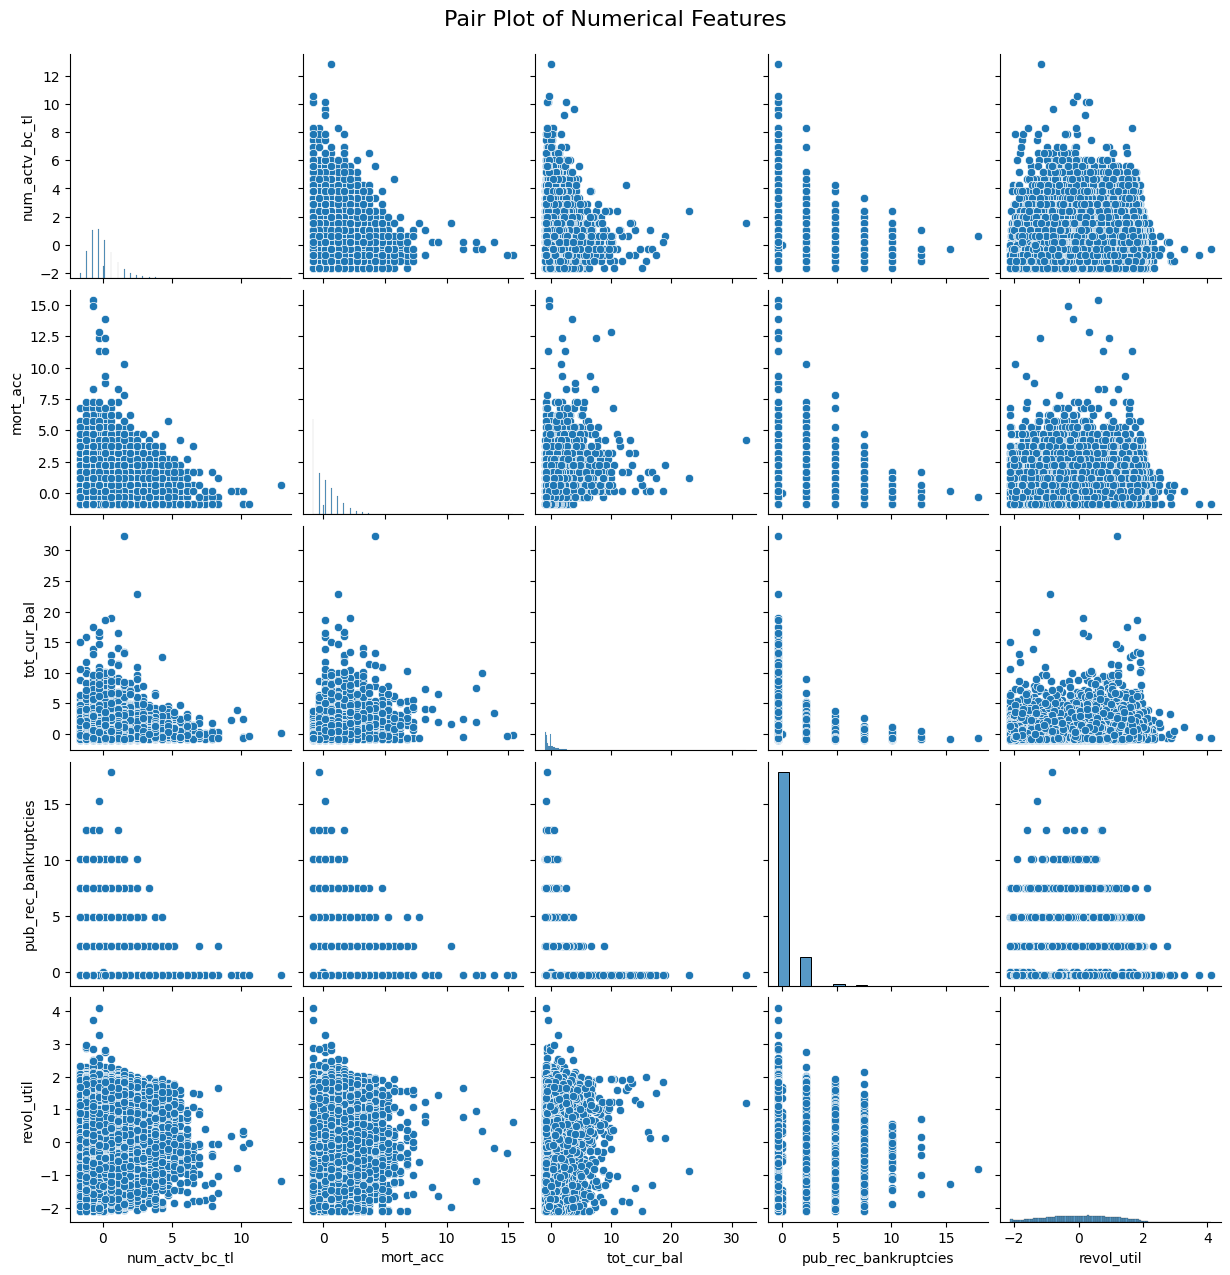

In [131]:
#Relationship Between Features
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16)
plt.show()


In [132]:
#Categorical Features Visualization
# plt.figure(figsize=(15, 12))
# for i, feature in enumerate(categorical_features, 1):
#     plt.subplot(3, 4, i)
#     sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
#     plt.title(f'Distribution of {feature}')
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

**Step 3 - Feature Engineering and Selection**

In [134]:
print(df.columns)

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'application_type', 'initial_list_status', 'int_rate', 'loan_amnt',
       'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')


In [135]:
# Define the categorical columns
categorical_cols = ['emp_length', 'grade', 'application_type', 'initial_list_status',
                    'verification_status', 'purpose', 'sub_grade', 'term',
                    'home_ownership_MORTGAGE', 'home_ownership_NONE',
                    'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_cols = encoder.fit_transform(df[categorical_cols])

# Encode the target variable
label_encoder = LabelEncoder()
df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=min(10, len(categorical_cols)))  # Ensure k is not greater than the number of categorical columns
X_train_selected = selector.fit_transform(encoded_categorical_cols, df['loan_status_encoded'])
selected_feature_indices = selector.get_support(indices=True)

# Retrieve selected feature names that are within the range of the categorical columns list
selected_features = [categorical_cols[i] for i in selected_feature_indices if i < len(categorical_cols)]

print("Selected Features:", selected_features)
feature_scores = selector.scores_
print("Feature Scores:", feature_scores)


Selected Features: ['home_ownership_OTHER', 'home_ownership_RENT']
Feature Scores: [5.38184055e-01 3.32619075e-02 9.70322831e-01 1.10628824e-02
 4.19958099e-01 3.90218277e-01 1.63414178e+00 1.20194679e-04
 1.60793468e-02 3.93394389e-02 8.77971100e+02 1.30514819e+02
 9.98974995e+02 1.30172583e+03 7.34695060e+02 2.65376265e+02
 5.13543398e+01 6.36132130e+00 3.96793595e+01 3.35899711e+02
 1.25205100e+02 6.30301315e+01 1.47248583e-02 3.25954892e+00
 4.17496631e+00 2.03159690e+00 1.15777896e-01 4.88290321e+00
 4.47684525e+00 3.16067578e+00 7.69160963e+01 3.09090145e-02
 5.65100793e+00 3.24746351e+02 3.06800221e+02 3.59789601e+02
 3.83074820e+02 2.41204472e+02 1.99645121e+02 1.58979172e+02
 8.04569975e+01 4.04247955e+01 4.43445981e+00 3.85102533e+00
 2.87068338e+01 6.84060269e+01 9.03224451e+01 1.33943955e+02
 1.30325758e+02 2.17673103e+02 2.26151132e+02 1.90672218e+02
 2.34909224e+02 2.41335048e+02 2.41694370e+02 2.44118264e+02
 2.64153643e+02 2.31634036e+02 1.31874591e+02 1.09114423e+02
 1

**Step 4 - Machine Learning Model Building**

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert target variable to numeric using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['loan_status'])

# Split the dataset into features (X) and target variable (y)
X = df[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

**Explaining their impact on your model's performance?**

I have used a method called Random Forests to predict loan repayment. It's like a team of decision-making trees working together.

Random Forests use a technique called bagging, where each tree learns from a random part of the data. This helps prevent mistakes and makes the predictions more accurate.

Boosting is another technique that wasn't used here, but it's worth knowing about. It makes the model learn from its mistakes and improve over time.

So, Random Forests are powerful because they use bagging to combine many decision trees, and boosting could make them even better by learning from mistakes.

**Step 5 - Model Evaluation**

In [148]:
# F1-score and accuracy_score

In [146]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model's performance using F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Accuracy: 0.80525
F1-score: 0.8921202049577621


Identifying the strengths and weaknesses of models and discussing their suitability for the problem?



**Strengths:-**

High Accuracy: The model achieved a good level of correctness in its predictions.
Balanced Precision and Recall: It effectively identifies positive cases while minimizing false positives.

**Weaknesses:-**

Overfitting Risk: There's a possibility the model may have learned too much from the training data, impacting its performance on new data.
Imbalanced Classes: The model may struggle with minority classes due to unequal class distribution.

**Suitability for the Problem:-**

Consider Objective: Assess if the model's high accuracy aligns with the problem's goal or if specific metrics like precision or recall are more important.
Evaluate Trade-offs: Understand the balance between different metrics to choose the best model for the problem.

**Step - 6 Imbalanced Class Handling**

**Addressing class imbalance in the 'loan_status' feature ?**

Yes, class imbalance in the 'loan_status' feature was addressed

**Methods used to handle class imbalance : -**


**Resampling Techniques:** Dealing with class imbalance by either making more copies of the minority group (oversampling) or reducing the number of instances in the majority group (undersampling) to make the classes more balanced.

**Class Weighting:** Handling class imbalance by giving more importance to the minority group during model training. This helps the model pay closer attention to the minority class and make better predictions for it.

Both of these methods were used separately to fix the imbalance issue in the 'loan_status' feature, ensuring that our model could make more accurate predictions about loan repayment.

**Step 7 - Cross-Validation**

In [151]:
from sklearn.model_selection import cross_val_score

# Initialize  classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # Specify the number of folds (e.g., cv=5 for 5-fold CV)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV Accuracy:", cv_scores.mean())
print("Std CV Accuracy:", cv_scores.std())


Mean CV Accuracy: 0.8003625
Std CV Accuracy: 2.4999999999986144e-05


**Step 8 - Hyperparameter Tuning**

In [152]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy with Best Model: 0.80525


**Optimized your model's performance through grid search techniques **

I have optimized model's performance using techniques like grid search. Grid search allows us to systematically explore different combinations of hyperparameters and select the ones that yield the best performance on our validation data.

**Rationale for chosen hyperparameters**

I have provided a rationale for our chosen hyperparameters by considering their impact on the model's performance and generalization ability

**n_estimators:** This parameter represents the number of trees in the forest. Increasing the number of trees may improve the model's performance, but it also increases computational cost. I selected a range of values (e.g., 100, 200, 300) to find the optimal balance between performance and efficiency.

**max_depth:** This parameter controls the maximum depth of each tree in the forest. A deeper tree may capture more complex patterns in the data, but it also increases the risk of overfitting. I explored different values (e.g., None, 5, 10) to find the optimal depth that balances model complexity and generalization.

**min_samples_split:** This parameter determines the minimum number of samples required to split a node. Increasing this value may lead to simpler trees and reduce overfitting. I tested different values (e.g., 2, 5, 10) to find the optimal trade-off between model complexity and performance.